<h1><b>Project Summary: ASL Hand Gesture Recognition</b></h1>
<p>
  This project focuses on building a deep learning model to recognize hand gestures in
  <b>American Sign Language (ASL)</b> using <b>Convolutional Neural Networks (CNNs)</b>.
  The goal is to classify <b>36 ASL symbols</b> (digits <code>0-9</code> and letters <code>a-z</code>)
  using a labeled dataset of hand gesture images.
</p>

<hr>

<h2><b>Pipeline Overview</b></h2>

<h3>1. Dataset Preparation</h3>
<ul>
  <li>The dataset is organized into categories representing each ASL class.</li>
  <li>Images are visualized, and class distribution is analyzed to understand dataset properties.</li>
</ul>

<h3>2. Data Preprocessing</h3>
<ul>
  <li>The dataset is split into <b>training (80%)</b>, <b>validation (10%)</b>, and <b>testing (10%)</b> sets using the <code>splitfolders</code> library.</li>
  <li><code>ImageDataGenerator</code> is used to rescale image pixel values and load data in batches for model training.</li>
</ul>

<h3>3. Model Design</h3>
<ul>
  <li>A <b>Sequential CNN model</b> is built with the following structure:</li>
  <ul>
    <li><b>Convolutional Blocks</b>:
      <ul>
        <li>Each block contains two convolutional layers with ReLU activation, followed by max-pooling and dropout for regularization.</li>
      </ul>
    </li>
    <li><b>Fully Connected Layers</b>:
      <ul>
        <li>Layers extract features and perform final classification using a softmax activation function.</li>
      </ul>
    </li>
  </ul>
  <li>Regularization techniques like <b>dropout</b> are used to prevent overfitting.</li>
</ul>

<h3>4. Training and Optimization</h3>
<ul>
  <li>The model is compiled using <b>categorical cross-entropy loss</b> and the <b>Adam optimizer</b>.</li>
  <li>Training is enhanced with:
    <ul>
      <li><b>Early Stopping</b>: Stops training when validation performance stops improving.</li>
      <li><b>Learning Rate Reduction</b>: Reduces learning rate when validation accuracy plateaus.</li>
    </ul>
  </li>
</ul>

<h3>5. Evaluation</h3>
<ul>
  <li>The model is evaluated on training, validation, and test sets.</li>
  <li>Metrics such as <b>accuracy</b>, <b>precision</b>, <b>recall</b>, and <b>F1-score</b> are computed.</li>
  <li>A <b>confusion matrix</b> is visualized to assess prediction performance for each class.</li>
</ul>

<h3>6. Results</h3>
<ul>
  <li>Training and validation accuracy/loss are plotted to visualize model convergence.</li>
  <li>Correct and incorrect predictions are analyzed to identify potential improvements.</li>
</ul>

<h3>7. Model Saving</h3>
<ul>
  <li>The trained model is saved as <code>ASL_model.h5</code> for future use in real-time ASL recognition tasks.</li>
</ul>

<hr>

<h2><b>Applications</b></h2>
<p>
  This project demonstrates how <b>deep learning</b>

<hr>


<h2>Installing the split-folders Library</h2>
<p>
  The command <code>pip install split-folders</code> installs the <b>split-folders</b> Python library. This library is used for efficiently splitting datasets into
  training, validation, and testing subsets. It is particularly helpful for organizing large datasets in machine learning workflows.
</p>

In [ ]:
pip install split-folders

<h2>Importing Required Libraries</h2>
<p>
  This section imports the necessary libraries and modules for various tasks in the project:
</p>
<ul>
  <li><b>os</b>, <b>re</b>: For file and string operations.</li>
  <li><b>numpy</b>, <b>pandas</b>: For numerical computations and data manipulation.</li>
  <li><b>matplotlib.pyplot</b>, <b>seaborn</b>: For data visualization.</li>
  <li><b>random</b>: For random number generation.</li>
  <li><b>splitfolders</b>: To split datasets into training, validation, and testing subsets.</li>
  <li><b>tensorflow</b>: For building and training deep learning models.</li>
  <li><b>ImageDataGenerator</b>: For preprocessing image data and creating augmented datasets.</li>
  <li><b>Sequential</b>: To create a linear stack of layers for the model.</li>
  <li><b>Various Keras Layers</b>: For defining layers like convolution, dropout, pooling, and dense layers.</li>
  <li><b>Callbacks</b>: For controlling the training process (e.g., stopping early or adjusting learning rates).</li>
  <li><b>plot_model</b>: To visualize the architecture of the deep learning model.</li>
  <li><b>sklearn.metrics</b>: For evaluating the model with metrics like classification reports and confusion matrices.</li>
</ul>
<p>
  These libraries provide the tools needed for data handling, visualization, and building a deep learning pipeline for the ASL hand gesture recognition task.
</p>

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

<h2>Mounting Google Drive in Colab</h2>
<p>
  The command <code>from google.colab import drive</code> imports the <b>drive</b> module from <b>Google Colab</b>. This allows access to files stored in Google Drive from within the Colab environment.
</p>
<p>
  The function <code>drive.mount('/content/drive')</code> mounts your Google Drive to the Colab virtual machine, making your Google Drive files accessible under the <code>/content/drive</code> directory.
</p>
<p>
  This is essential for accessing datasets or saving models directly to Google Drive while working in Colab.
</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Loading and Organizing Dataset</h2>
<p>
  In this section, we define the base path for the dataset and categorize the images into 36 classes (0-9, a-z).
  We create a <code>categories</code> dictionary to map each class index to its corresponding label.
</p>
<p>
  The function <code>add_class_name_prefix</code> is used to add the class prefix to each filename for better organization in the dataframe.
</p>
<p>
  A list of filenames and their corresponding categories is generated by iterating through each class in the <code>categories</code> dictionary.
  The <code>os.listdir</code> function is used to retrieve the filenames from each class directory.
</p>
<p>
  These lists are then combined into a Pandas DataFrame, with the <code>filename</code> and <code>category</code> as columns.
  The <code>add_class_name_prefix</code> function is applied to add a prefix to the filenames.
</p>
<p>
  Finally, the dataframe is shuffled using <code>sample(frac=1)</code> and reset to ensure random ordering of the data.
</p>

In [ ]:
base_path = "/content/drive/MyDrive/asl_dataset/"

categories = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
    10: "a", 11: "b", 12: "c", 13: "d", 14: "e", 15: "f", 16: "g", 17: "h", 18: "i", 19: "j",
    20: "k", 21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r", 28: "s", 29: "t",
    30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"
}

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2] + "/" + x
    )
    return df

filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

filename  category
0      q/hand4_q_bot_seg_4_cropped.jpeg        26
1      w/hand5_w_dif_seg_5_cropped.jpeg        32
2      0/hand4_0_bot_seg_3_cropped.jpeg         0
3      8/hand1_8_top_seg_2_cropped.jpeg         8
4      5/hand1_5_bot_seg_3_cropped.jpeg         5
...                                 ...       ...
2510  f/hand1_f_left_seg_1_cropped.jpeg        15
2511  f/hand2_f_left_seg_5_cropped.jpeg        15
2512   5/hand4_5_bot_seg_5_cropped.jpeg         5
2513   f/hand5_f_bot_seg_3_cropped.jpeg        15
2514   1/hand5_1_bot_seg_4_cropped.jpeg         1

[2515 rows x 2 columns]

In [ ]:
print("Number of elements = ", len(df))

number of elements =  2515


<h2>Displaying Sample Images from the Dataset</h2>
<p>
  In this section, a figure with a size of 40x40 inches is created using <code>plt.figure(figsize=(40,40))</code>.
  The code iterates over the first 100 rows of the DataFrame <code>df</code> to display sample images from the dataset.
</p>
<p>
  For each image, the file path is constructed by combining the base path and the filename stored in <code>df.filename[i]</code>.
  The image is read using <code>plt.imread(path)</code> and displayed using <code>plt.imshow(img)</code>.
</p>
<p>
  Each image is placed in a subplot of a 10x10 grid using <code>plt.subplot(10, 10, i + 1)</code>, which organizes the images in a matrix-like layout.
</p>
<p>
  The title of each image is set to the corresponding category using <code>plt.title(categories[df.category[i]], fontsize=35, fontstyle='italic')</code>,
  and the axes are turned off with <code>plt.axis("off")</code> to focus on the images without axis labels.
</p>

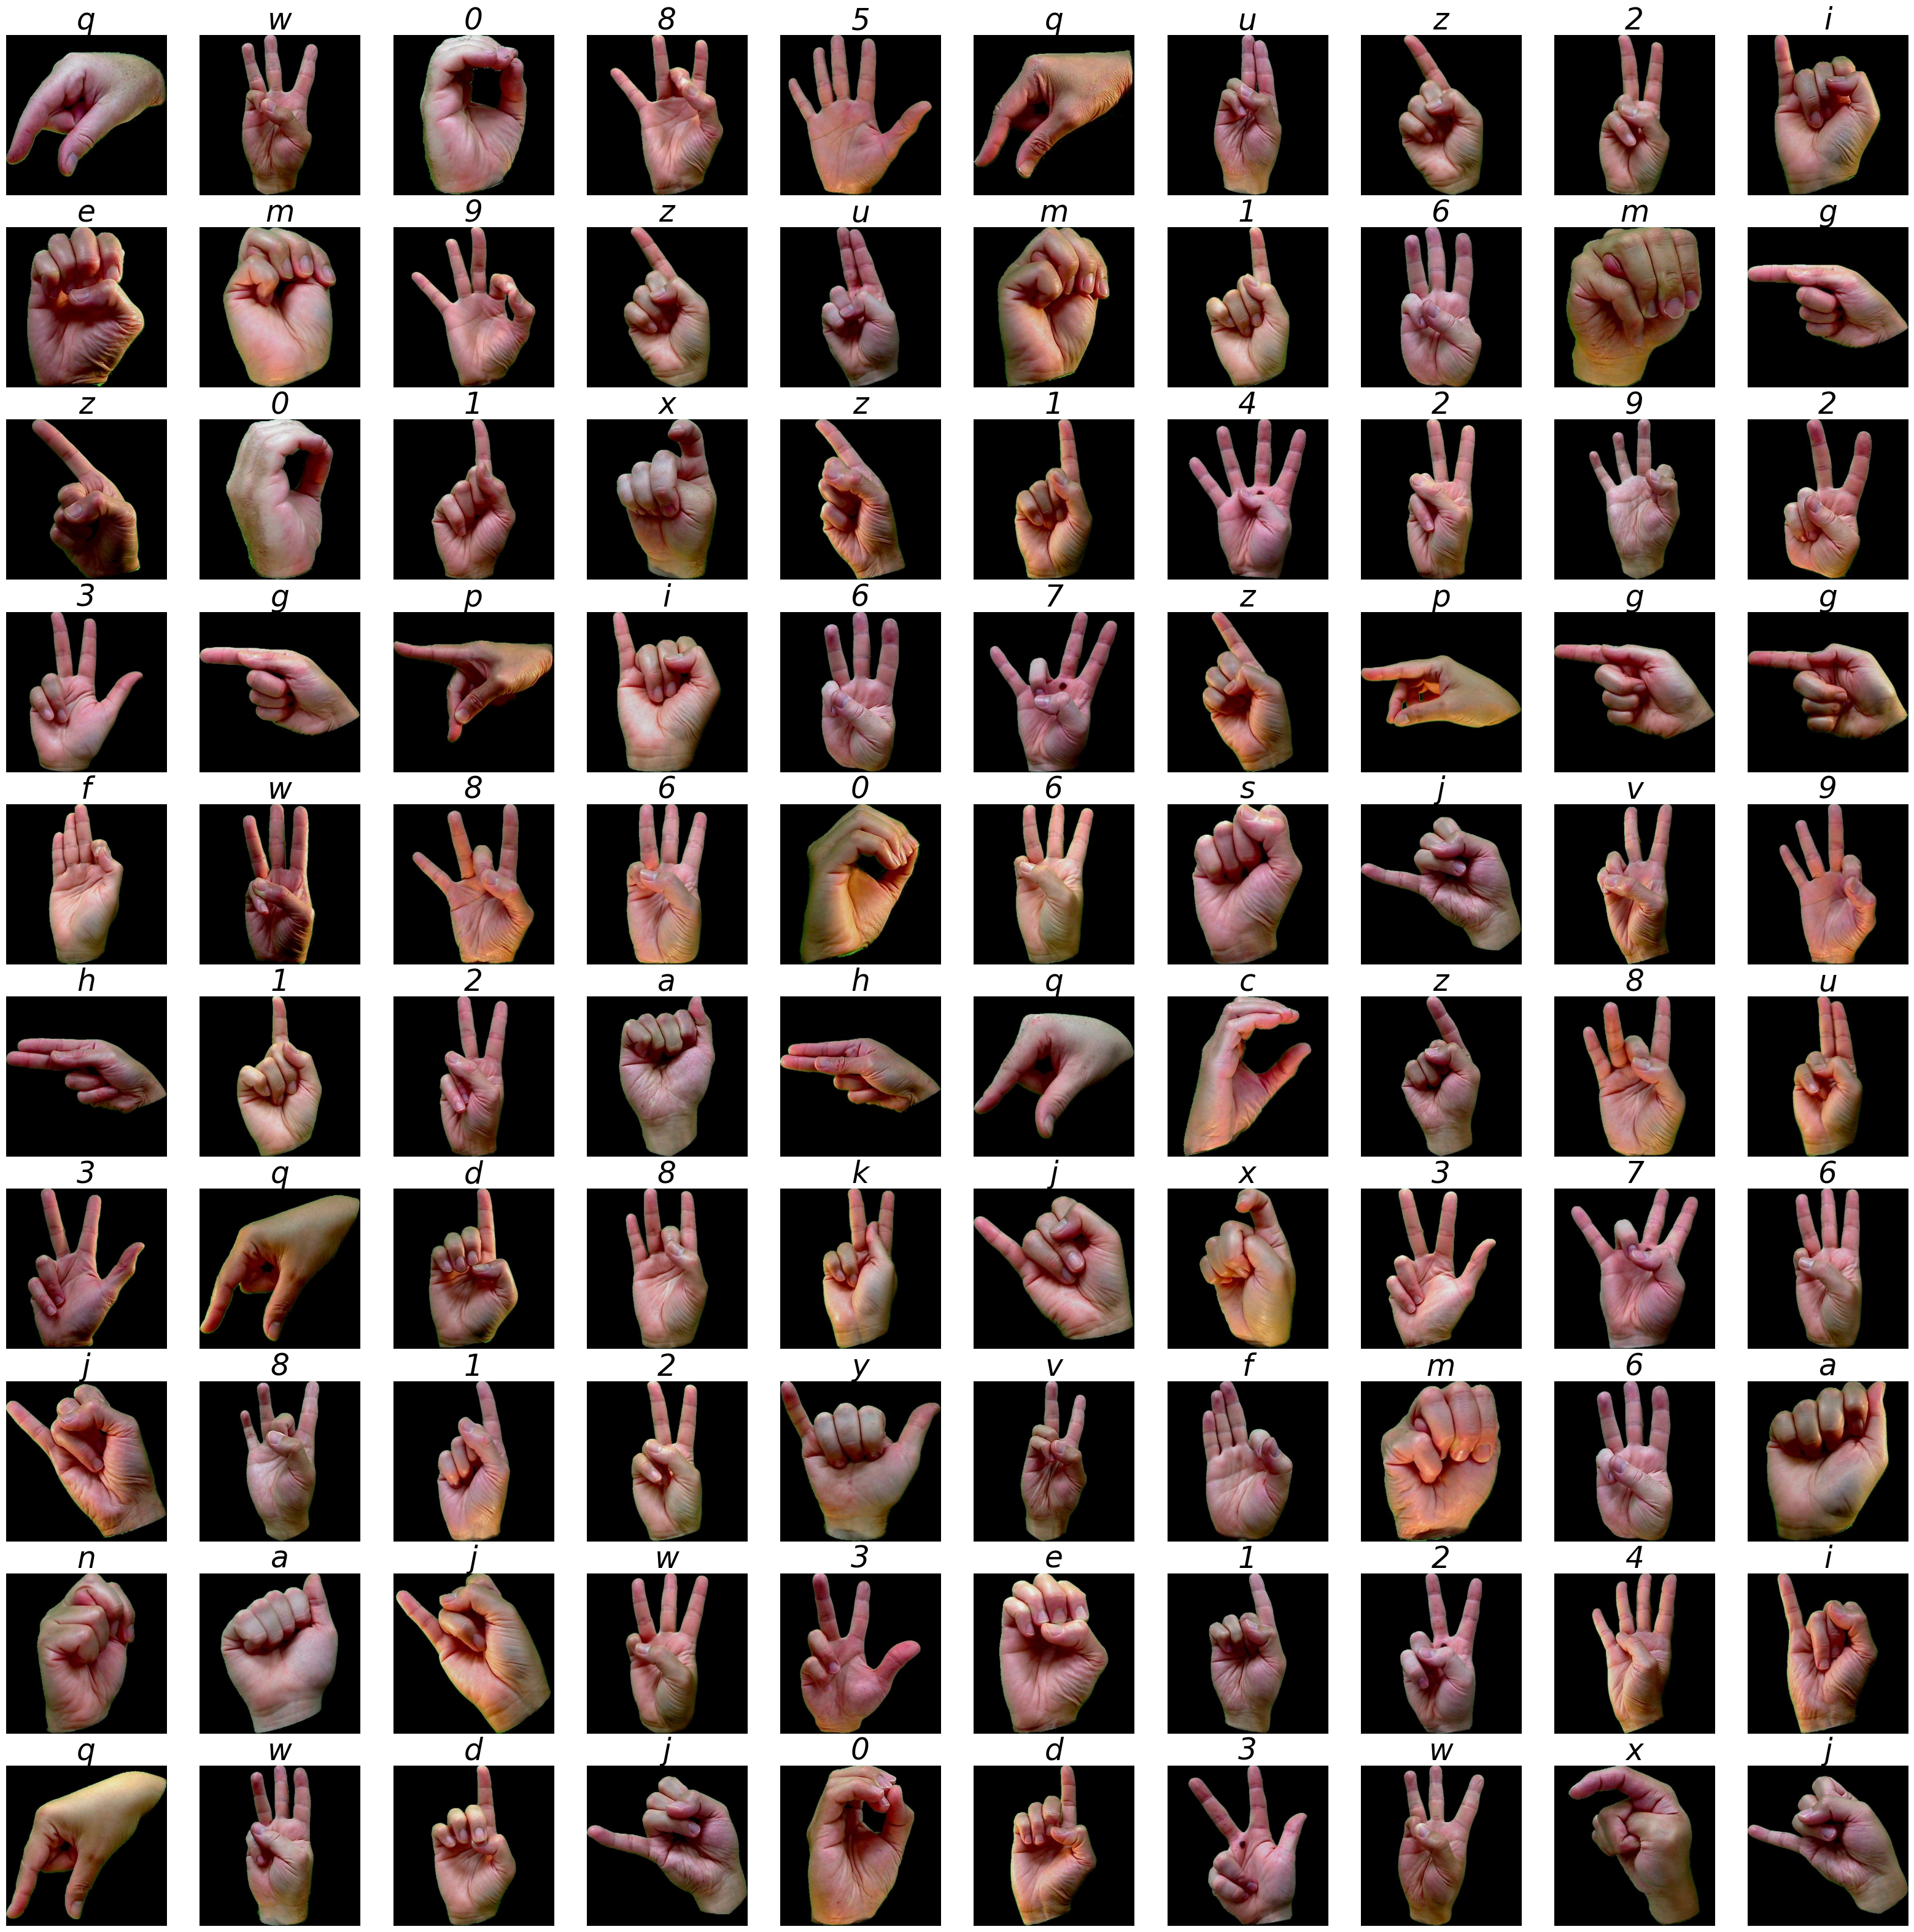

In [ ]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = base_path + df.filename[i]
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

<h2>Visualizing Class Distribution</h2>
<p>
  The <code>np.unique</code> function is used to calculate the unique values and their counts in the <code>category</code> column of the DataFrame <code>df</code>.
  This returns two arrays: the unique labels and their corresponding counts.
</p>
<p>
  A new DataFrame <code>uni</code> is created to store these counts with the class labels as the index and the count values in a column named 'Count'.
</p>
<p>
  A bar plot is generated using Seaborn's <code>barplot</code> function to visualize the distribution of the classes.
  The <code>palette='icefire'</code> specifies the color palette, and the <code>width=0.4</code> controls the width of the bars.
</p>
<p>
  The figure size is set to <code>14x4</code> inches with a DPI of 200 for high-quality output, and the plot title is set to "Class distribution in Dataset".
</p>
<p>
  The <code>plt.show()</code> function is called to display the plot.
</p>

<ipython-input-38-dbdd0cfa8f38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni,x=uni.index,y='Count',palette='viridis',width=0.4).set_title('Class distribution in Dataset',fontsize=15)


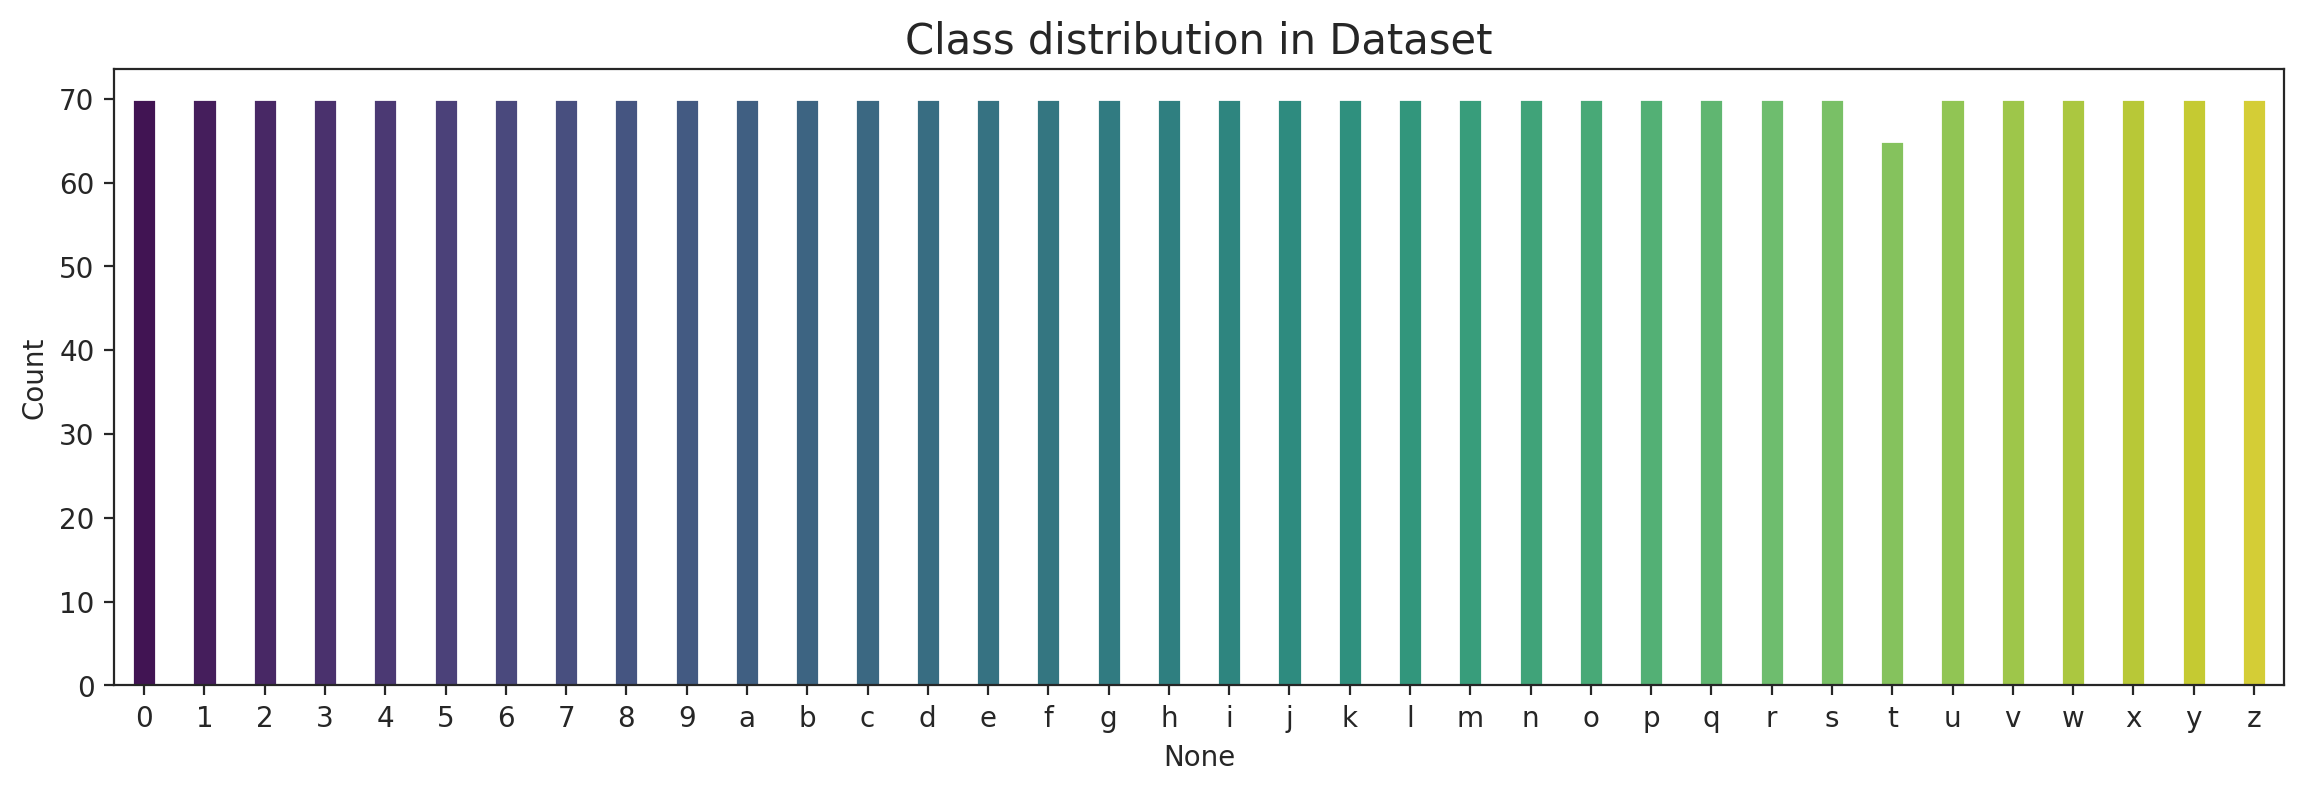

In [ ]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='viridis',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

<h2>Splitting the Dataset</h2>
    
<p>We will split the data into three parts:</p>
<ul>
  <li><strong>Training dataset</strong> (80%)</li>
  <li><strong>Validation dataset</strong> (10%)</li>
  <li><strong>Testing dataset</strong> (10%)</li>
</ul>

<p>
  The <code>splitfolders.ratio</code> function is used to split the dataset into training, validation, and test sets.
  The source directory <code>/content/drive/MyDrive/asl_dataset</code> contains the original dataset, and the output directory
  <code>/content/drive/MyDrive/kaggle/working/</code> is where the split data will be stored.
</p>
<p>
  The <code>ratio=(0.8, 0.1, 0.1)</code> argument indicates that 80% of the data will be used for training, 10% for validation, and 10% for testing.
</p>
<p>
  The <code>seed=1333</code> argument ensures that the split is reproducible by setting a fixed random seed.
</p>
<p>
  This function automatically organizes the data into separate subdirectories for each split (train, val, test) and each class within them.
</p>

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/asl_dataset',output='/content/drive/MyDrive/kaggle/working/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 2515 files [00:39, 64.02 files/s]


<a id='7'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

<h2>Image Data Normalization</h2>
<p>
  The <code>ImageDataGenerator</code> class from TensorFlow is used to perform real-time data augmentation and preprocessing on the images.
  In this case, the <code>rescale=1.0 / 255</code> argument is used to normalize the pixel values of the images, converting them from the range of 0-255 to 0-1.
  This is a common practice in deep learning models to ensure that the input features are in a suitable range for the model to process efficiently.
</p>

In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

<h2>Defining Dataset Paths and Model Parameters</h2>
<p>
  The following paths are defined to specify the directories for training, validation, and testing datasets:
</p>
<ul>
  <li><code>train_path</code>: Path to the training dataset (<em>/content/drive/MyDrive/kaggle/working/train/asl_dataset_train</em>).</li>
  <li><code>val_path</code>: Path to the validation dataset (<em>/content/drive/MyDrive/kaggle/working/val/asl_dataset_val</em>).</li>
  <li><code>test_path</code>: Path to the testing dataset (<em>/content/drive/MyDrive/kaggle/working/test/asl_dataset_test</em>).</li>
</ul>
<p>
  Additionally, important parameters for the model are defined:
</p>
<ul>
  <li><code>batch</code>: Batch size, set to <strong>32</strong>, determines the number of samples processed at a time during training.</li>
  <li><code>image_size</code>: Target size for images, set to <strong>200x200 pixels</strong>, ensuring all images are resized uniformly.</li>
  <li><code>img_channel</code>: Number of image channels, set to <strong>3</strong> (indicating RGB color images).</li>
  <li><code>n_classes</code>: Total number of classes in the dataset, set to <strong>36</strong> (representing 26 letters and 10 digits).</li>
</ul>

In [ ]:
train_path = '/content/drive/MyDrive/kaggle/working/train/asl_dataset_train'
val_path = '/content/drive/MyDrive/kaggle/working/val/asl_dataset_val'
test_path = '/content/drive/MyDrive/kaggle/working/test/asl_dataset_test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

<h2>Loading Dataset with ImageDataGenerator</h2>
<p>
  The <code>flow_from_directory</code> method from TensorFlow's <code>ImageDataGenerator</code> is used to load images from the specified directories and prepare them for training, validation, and testing.
</p>
<p>
  Each dataset is configured as follows:
</p>
<ul>
  <li>
    <strong>Training Data:</strong> Loaded from <code>train_path</code> with images resized to <code>image_size x image_size</code> (200x200 pixels).
    <code>batch_size</code> is set to 32, and the <code>class_mode</code> is <code>'categorical'</code> for multi-class classification.
  </li>
  <li>
    <strong>Validation Data:</strong> Loaded from <code>val_path</code> using the same settings as the training data to evaluate model performance during training.
  </li>
  <li>
    <strong>Testing Data:</strong> Loaded from <code>test_path</code>. The <code>shuffle</code> parameter is set to <code>False</code> to ensure predictions align with the order of test labels for evaluation.
  </li>
</ul>
<p>
  The <code>target_size</code> ensures all images are uniformly resized, and <code>class_mode='categorical'</code> organizes the labels as one-hot encoded arrays suitable for multi-class classification tasks.
</p>

In [ ]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


<a id='10'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>
<p>
  A Convolutional Neural Network (CNN) is created using TensorFlow's <code>Sequential</code> API. The architecture includes the following layers:
</p>
<ul>
  <li>
    <strong>Block 1:</strong>
    <ul>
      <li>Two convolutional layers with 32 filters, a kernel size of 3x3, ReLU activation, and 'same' padding.</li>
      <li>MaxPooling layer to reduce spatial dimensions.</li>
      <li>Dropout layer with a rate of 0.2 to prevent overfitting.</li>
    </ul>
  </li>
  <li>
    <strong>Block 2:</strong>
    <ul>
      <li>Two convolutional layers with 64 filters and the same settings as Block 1.</li>
      <li>MaxPooling and Dropout (rate 0.3).</li>
    </ul>
  </li>
  <li>
    <strong>Block 3:</strong>
    <ul>
      <li>Two convolutional layers with 128 filters and the same settings as previous blocks.</li>
      <li>MaxPooling and Dropout (rate 0.4).</li>
    </ul>
  </li>
  <li>
    <strong>Fully Connected Layers:</strong>
    <ul>
      <li>Flatten layer to convert 2D outputs into a 1D vector.</li>
      <li>Dense layer with 512 neurons and ReLU activation.</li>
      <li>Dropout layer with a rate of 0.2.</li>
      <li>Dense layer with 128 neurons and ReLU activation.</li>
      <li>Dropout layer with a rate of 0.3.</li>
    </ul>
  </li>
  <li>
    <strong>Output Layer:</strong>
    <ul>
      <li>Dense layer with 36 neurons (one for each class) and <code>softmax</code> activation to output class probabilities.</li>
    </ul>
  </li>
</ul>
<p>
  The model structure is summarized using the <code>model.summary()</code> method, providing an overview of the architecture, layers, and parameters.
</p>

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(36, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 200, 200, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      40,960,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,317,828 (157.62 MB)

 Trainable params: 41,317,828 (157.62 MB)

 Non-trainable params: 0 (0.00 B)

<h2>Defining Callbacks for Model Training</h2>
<p>
  Callbacks are tools that help monitor and optimize the model's performance during training. In this case, two callbacks are defined:
</p>
<ul>
  <li>
    <strong>EarlyStopping:</strong>
    <ul>
      <li>Monitors the validation loss (<code>'val_loss'</code>).</li>
      <li>Stops training if the validation loss does not improve by at least <code>0.001</code> for <code>5</code> consecutive epochs (<code>patience=5</code>).</li>
      <li>Restores the best model weights observed during training (<code>restore_best_weights=True</code>).</li>
    </ul>
  </li>
  <li>
    <strong>ReduceLROnPlateau:</strong>
    <ul>
      <li>Monitors the validation accuracy (<code>'val_accuracy'</code>).</li>
      <li>Reduces the learning rate by a factor of <code>0.5</code> if validation accuracy does not improve for <code>2</code> consecutive epochs (<code>patience=2</code>).</li>
      <li>Helps the optimizer explore smaller updates when the model stagnates.</li>
    </ul>
  </li>
</ul>
<p>
  These callbacks are integrated into the training process to enhance performance and prevent overfitting.
</p>

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

<h2>Compiling the Model</h2>
<p>
  The model is compiled to prepare it for training. This step defines the following:
</p>
<ul>
  <li>
    <strong>Optimizer:</strong> <code>'adam'</code> is used as the optimization algorithm. It adjusts the learning rate dynamically during training, making it effective and efficient for deep learning models.
  </li>
  <li>
    <strong>Loss Function:</strong> <code>'categorical_crossentropy'</code> is used because the task involves multi-class classification with one-hot encoded labels.
  </li>
  <li>
    <strong>Evaluation Metric:</strong> The model will report accuracy during training and evaluation, allowing us to monitor how well the model predicts the correct classes.
  </li>
</ul>
<p>
  This step finalizes the model configuration before the training process begins.
</p>

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

<h2>Training the Model</h2>
<p>
  The model is trained using the <code>fit()</code> method, which involves the following parameters:
</p>
<ul>
  <li>
    <strong>Training Data:</strong> <code>train_data</code> is used to train the model. This contains batches of preprocessed images and corresponding labels.
  </li>
  <li>
    <strong>Validation Data:</strong> <code>val_data</code> is used to evaluate the model's performance on unseen data during training to prevent overfitting.
  </li>
  <li>
    <strong>Epochs:</strong> The model will iterate through the dataset for <code>30</code> epochs, which are complete passes through the training data.
  </li>
  <li>
    <strong>Callbacks:</strong>
    <ul>
      <li>
        <code>early_stoping:</code> Stops training if no significant improvement is observed in validation loss.
      </li>
      <li>
        <code>reduce_learning_rate:</code> Reduces the learning rate dynamically when validation accuracy plateaus.
      </li>
    </ul>
  </li>
  <li>
    <strong>Verbose:</strong> Displays detailed logs during training. <code>verbose=1</code> provides progress bars and performance metrics for each epoch.
  </li>
</ul>
<p>
  The result of the training is stored in <code>asl_class</code>, which contains the history of the loss and accuracy for both training and validation data.
</p>

In [ ]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=30,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 761s 11s/step - accuracy: 0.1750 - loss: 3.0374 - val_accuracy: 0.8247 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 672s 11s/step - accuracy: 0.7788 - loss: 0.7446 - val_accuracy: 0.9163 - val_loss: 0.2166 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 678s 11s/step - accuracy: 0.8887 - loss: 0.3385 - val_accuracy: 0.9283 - val_loss: 0.1482 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 688s 11s/step - accuracy: 0.9299 - loss: 0.2013 - val_accuracy: 0.9522 - val_loss: 0.1264 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 663s 10s/step - accuracy: 0.9467 - loss: 0.1503 - val_accuracy: 0.9562 - val_loss: 0.1195 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 693s 11s/step - accuracy: 0.9641 - loss: 0.1012 - val_accuracy: 0.9602 - val_loss: 0.1144 - learning_rate: 0.0010
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 666s 11s/step - accuracy: 0.9686 - loss: 0.0975 - val_accurac

<h2>Evaluating Model Performance</h2>
<p>
  After training the model, we evaluate its performance on both the training and validation datasets to ensure it has learned effectively without overfitting.
</p>
<h3>Steps Performed:</h3>
<ul>
  <li>
    <strong>Training Data Evaluation:</strong>
    <ul>
      <li>The model is evaluated on the <code>train_data</code>, calculating the accuracy and loss for the training dataset.</li>
      <li>Results are printed as percentage accuracy and numerical loss using Python's <code>f-string</code>.</li>
    </ul>
  </li>
  <li>
    <strong>Validation Data Evaluation:</strong>
    <ul>
      <li>The model is evaluated on the <code>val_data</code> to assess its performance on unseen validation samples.</li>
      <li>Accuracy and loss are displayed for further analysis.</li>
    </ul>
  </li>
</ul>
<p>
  This process helps to understand whether the model has overfitted or underfitted by comparing metrics on training and validation datasets.
</p>

In [ ]:
# Evaluate training data
loss, acc = model.evaluate(train_data, verbose=0)
print(f'The accuracy of the model for training data is: {acc * 100:.2f}%')
print(f'The Loss of the model for training data is: {loss:.4f}')

# Evaluate validation data
loss, acc = model.evaluate(val_data, verbose=0)
print(f'The accuracy of the model for validation data is: {acc * 100:.2f}%')
print(f'The Loss of the model for validation data is: {loss:.4f}')

The accuracy of the model for training data is: 99.95%
The Loss of the model for training data is: 0.0011
The accuracy of the model for validation data is: 98.41%
The Loss of the model for validation data is: 0.0781


<h2>Model Training Performance: Accuracy & Loss</h2>
<p>
  This section visualizes the model's performance during training by plotting both <strong>accuracy</strong> and <strong>loss</strong> over epochs.
</p>
<h3>Steps Performed:</h3>
<ul>
  <li>
    <strong>Loss Plot:</strong>
    <ul>
      <li>Shows the change in <strong>cross-entropy loss</strong> during the training and validation phases.</li>
      <li>The <code>loss</code> and <code>val_loss</code> values are plotted over each epoch to observe how well the model reduces error during training and its ability to generalize on validation data.</li>
    </ul>
  </li>
  <li>
    <strong>Accuracy Plot:</strong>
    <ul>
      <li>Plots the <strong>classification accuracy</strong> over epochs for both training and validation datasets.</li>
      <li>Helps in evaluating how the model improves its prediction accuracy with each training epoch.</li>
    </ul>
  </li>
</ul>
<p>
  Both graphs use the training data and validation data metrics, which allow us to analyze if the model is overfitting or underfitting based on how the training and validation curves behave.
</p>

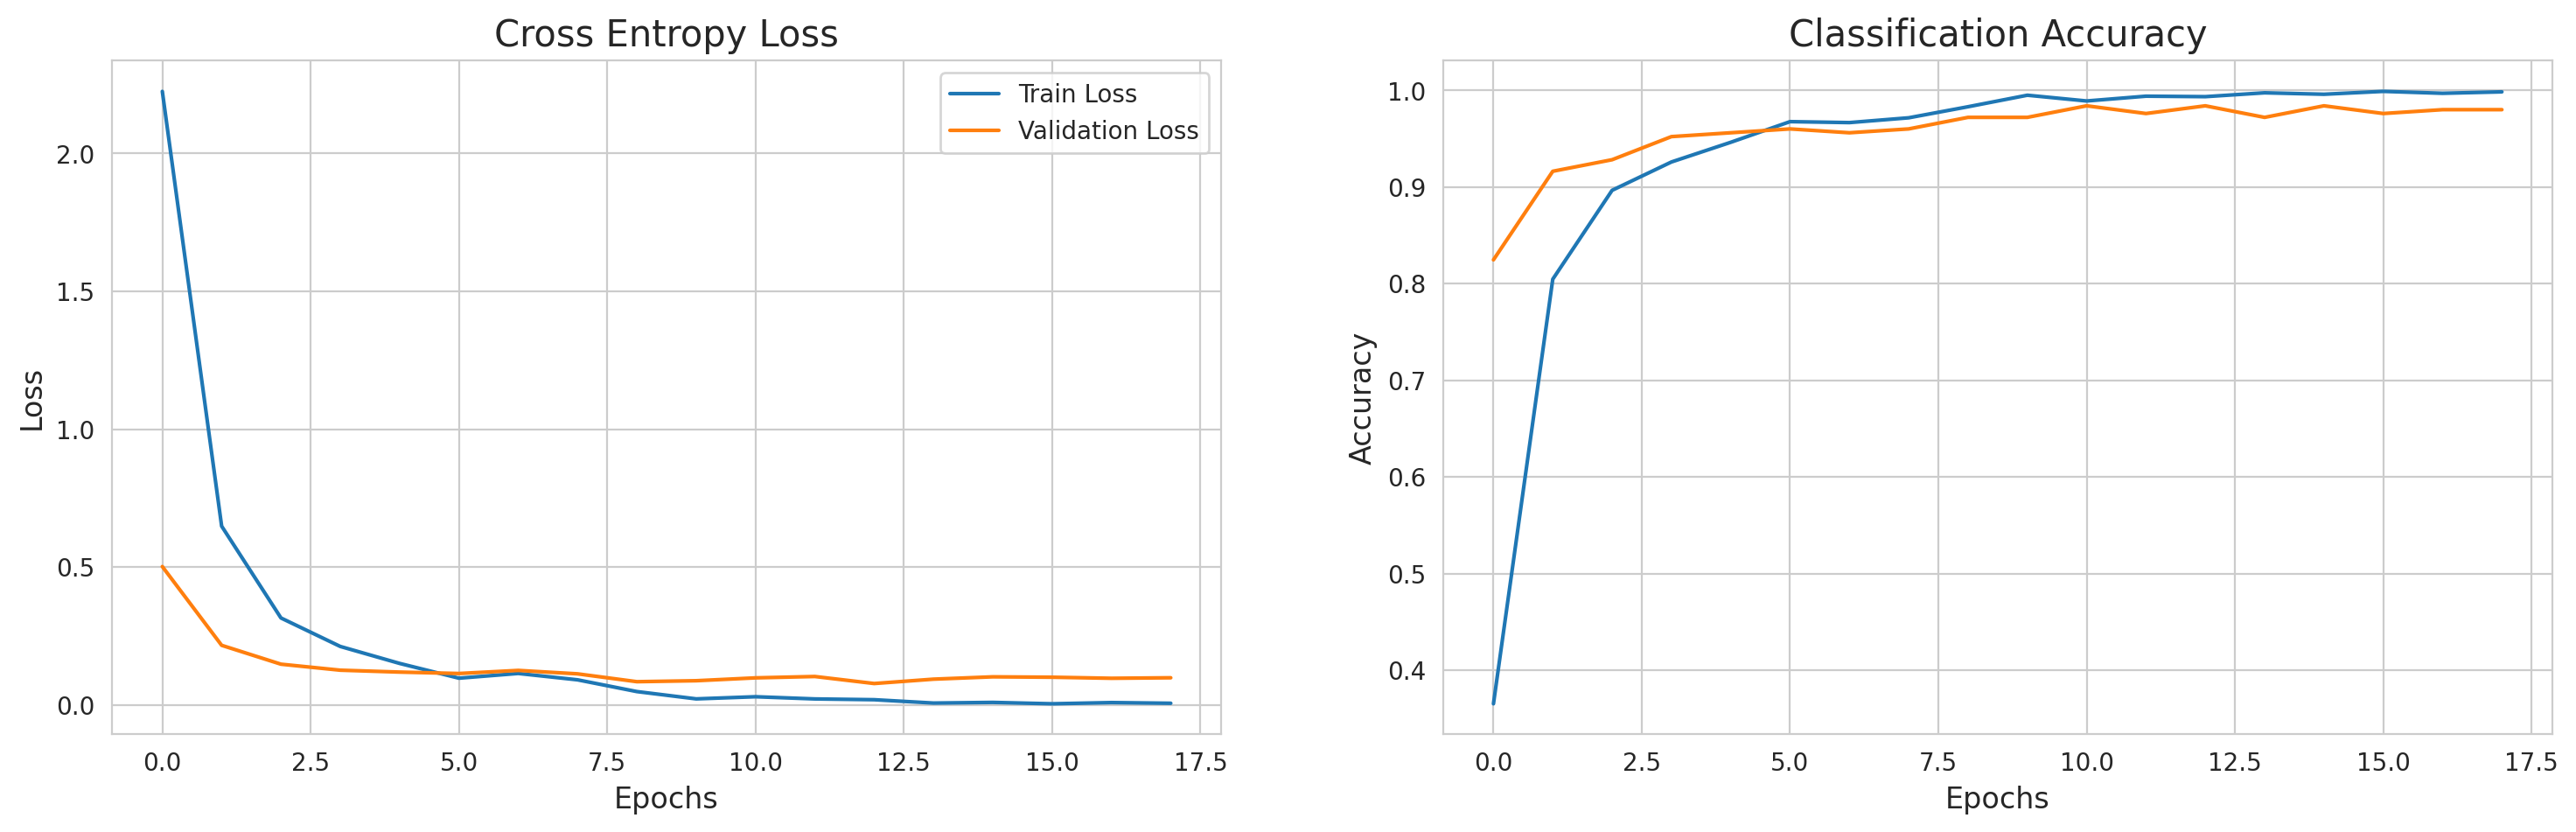

In [ ]:
# Plot accuracy and loss over epochs
error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('whitegrid')

# Plot Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label='Train Accuracy')
plt.plot(error['val_accuracy'], label='Validation Accuracy')

# Plot Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Train Loss')
plt.plot(error['val_loss'], label='Validation Loss')


plt.legend()
plt.show()

<h2>Model Evaluation on Test Data</h2>
<p>
  After training the model, we evaluate its performance on the test dataset. The steps include predicting the class labels for the test data and then comparing the predicted labels with the true labels.
</p>
<h3>Steps Performed:</h3>
<ul>
  <li>
    <strong>Prediction:</strong>
    <ul>
      <li>We use the trained model to make predictions on the test dataset using <code>model.predict()</code>.</li>
      <li>We convert the model’s output probabilities to class labels using <code>np.argmax()</code> to identify the predicted class.</li>
    </ul>
  </li>
  <li>
    <strong>Evaluation:</strong>
    <ul>
      <li>The model is evaluated using <code>model.evaluate()</code> on the test dataset, which returns the <strong>loss</strong> and <strong>accuracy</strong> metrics.</li>
      <li>The accuracy and loss are printed to assess how well the model performs on unseen data.</li>
    </ul>
  </li>
</ul>
<p>
  This process allows us to verify whether the model generalizes well to new, unseen data by evaluating its classification performance and error rate on the test set.
</p>

In [ ]:
# Make predictions
result = model.predict(test_data, verbose=0)

y_pred = np.argmax(result, axis=1)
y_true = test_data.labels

# Evaluate model on test data
loss, acc = model.evaluate(test_data, verbose=0)

print(f'The accuracy of the model for testing data is: {acc * 100:.2f}%')
print(f'The Loss of the model for testing data is: {loss:.4f}')

The accuracy of the model for testing data is: 94.44%
The Loss of the model for testing data is: 0.2434


<h2>Evaluation of Correct and Incorrect Predictions</h2>
<p>
  After making predictions on the test dataset, we evaluate the number of correct and incorrect predictions. The following steps are performed:
</p>
<h3>Steps Performed:</h3>
<ul>
  <li>
    <strong>Correct Predictions:</strong>
    <ul>
      <li>We compare the predicted labels <code>y_pred</code> with the true labels <code>y_true</code> using <code>np.nonzero(p == y)</code>.</li>
      <li>The result represents the indices where the predicted and true labels match. The count of correct predictions is obtained by checking the length of this result.</li>
    </ul>
  </li>
  <li>
    <strong>Incorrect Predictions:</strong>
    <ul>
      <li>We similarly find the indices where the predicted labels do not match the true labels using <code>np.nonzero(p != y)</code>.</li>
      <li>The number of incorrect predictions is determined by counting the elements where the predicted and true labels differ.</li>
    </ul>
  </li>
</ul>
<p>
  This step provides an understanding of how well the model performs, indicating the number of correctly and incorrectly classified instances in the test data.
</p>

In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 238
Incorrect predicted classes: 14


<h2>Classification Report</h2>
<p>
  After evaluating the model's performance on the test dataset, we generate a classification report, which provides key performance metrics for each class in the dataset. The <code>classification_report</code> function from <code>sklearn.metrics</code> is used to calculate the following metrics:
</p>
<ul>
  <li><strong>Precision:</strong> The ratio of correctly predicted positive observations to the total predicted positives. Precision gives an idea of how accurate the positive predictions are.</li>
  <li><strong>Recall:</strong> The ratio of correctly predicted positive observations to the total actual positives. Recall indicates how well the model can identify positive cases.</li>
  <li><strong>F1-Score:</strong> The weighted average of Precision and Recall. It balances the two metrics and is especially useful when class distribution is imbalanced.</li>
  <li><strong>Support:</strong> The number of actual occurrences of the class in the dataset.</li>
</ul>
<p>
  This report is generated for each class in the dataset, where <code>y_true</code> represents the true labels, <code>y_pred</code> represents the predicted labels, and <code>categories.values()</code> maps the numerical labels to their respective class names.
</p>
<p>
  The classification report allows for a detailed evaluation of how well the model is performing for each individual class in the dataset.
</p>

In [ ]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.78      1.00      0.88         7
           2       0.75      0.86      0.80         7
           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.92         7
           5       0.88      1.00      0.93         7
           6       1.00      0.86      0.92         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
           a       1.00      1.00      1.00         7
           b       1.00      0.86      0.92         7
           c       1.00      1.00      1.00         7
           d       1.00      1.00      1.00         7
           e       1.00      1.00      1.00         7
           f       1.00      1.00      1.00         7
           g       1.00      0.86      0.92         7
           h       1.00    

<h2>Confusion Matrix</h2>
<p>
  The confusion matrix provides a summary of the performance of the classification model. It compares the true labels (y_true) against the predicted labels (y_pred), showing how well the model performs for each class. In this visualization:
</p>
<ul>
  <li>The rows represent the actual class labels.</li>
  <li>The columns represent the predicted class labels.</li>
  <li>The diagonal values indicate the number of correct predictions for each class.</li>
  <li>Off-diagonal values represent misclassifications where the model predicted a different class.</li>
</ul>
<p>
  In this code, the <code>confusion_matrix</code> function from <code>sklearn.metrics</code> is used to generate the matrix. The <code>seaborn</code> library is then employed to plot the heatmap of the confusion matrix, with annotations for the count of correct and incorrect predictions.
</p>
<p>
  The <code>plt.subplots</code> function is used to create a figure with custom size and DPI. The <code>sns.heatmap</code> function then visualizes the confusion matrix using the "gist_yarg_r" color map, with annotations and labels for easy interpretation. The labels for the x and y axes, as well as the title, are also customized for clarity.
</p>
<p>
  This visualization helps assess the model's performance, highlighting areas where the model might be struggling to correctly classify certain classes.
</p>

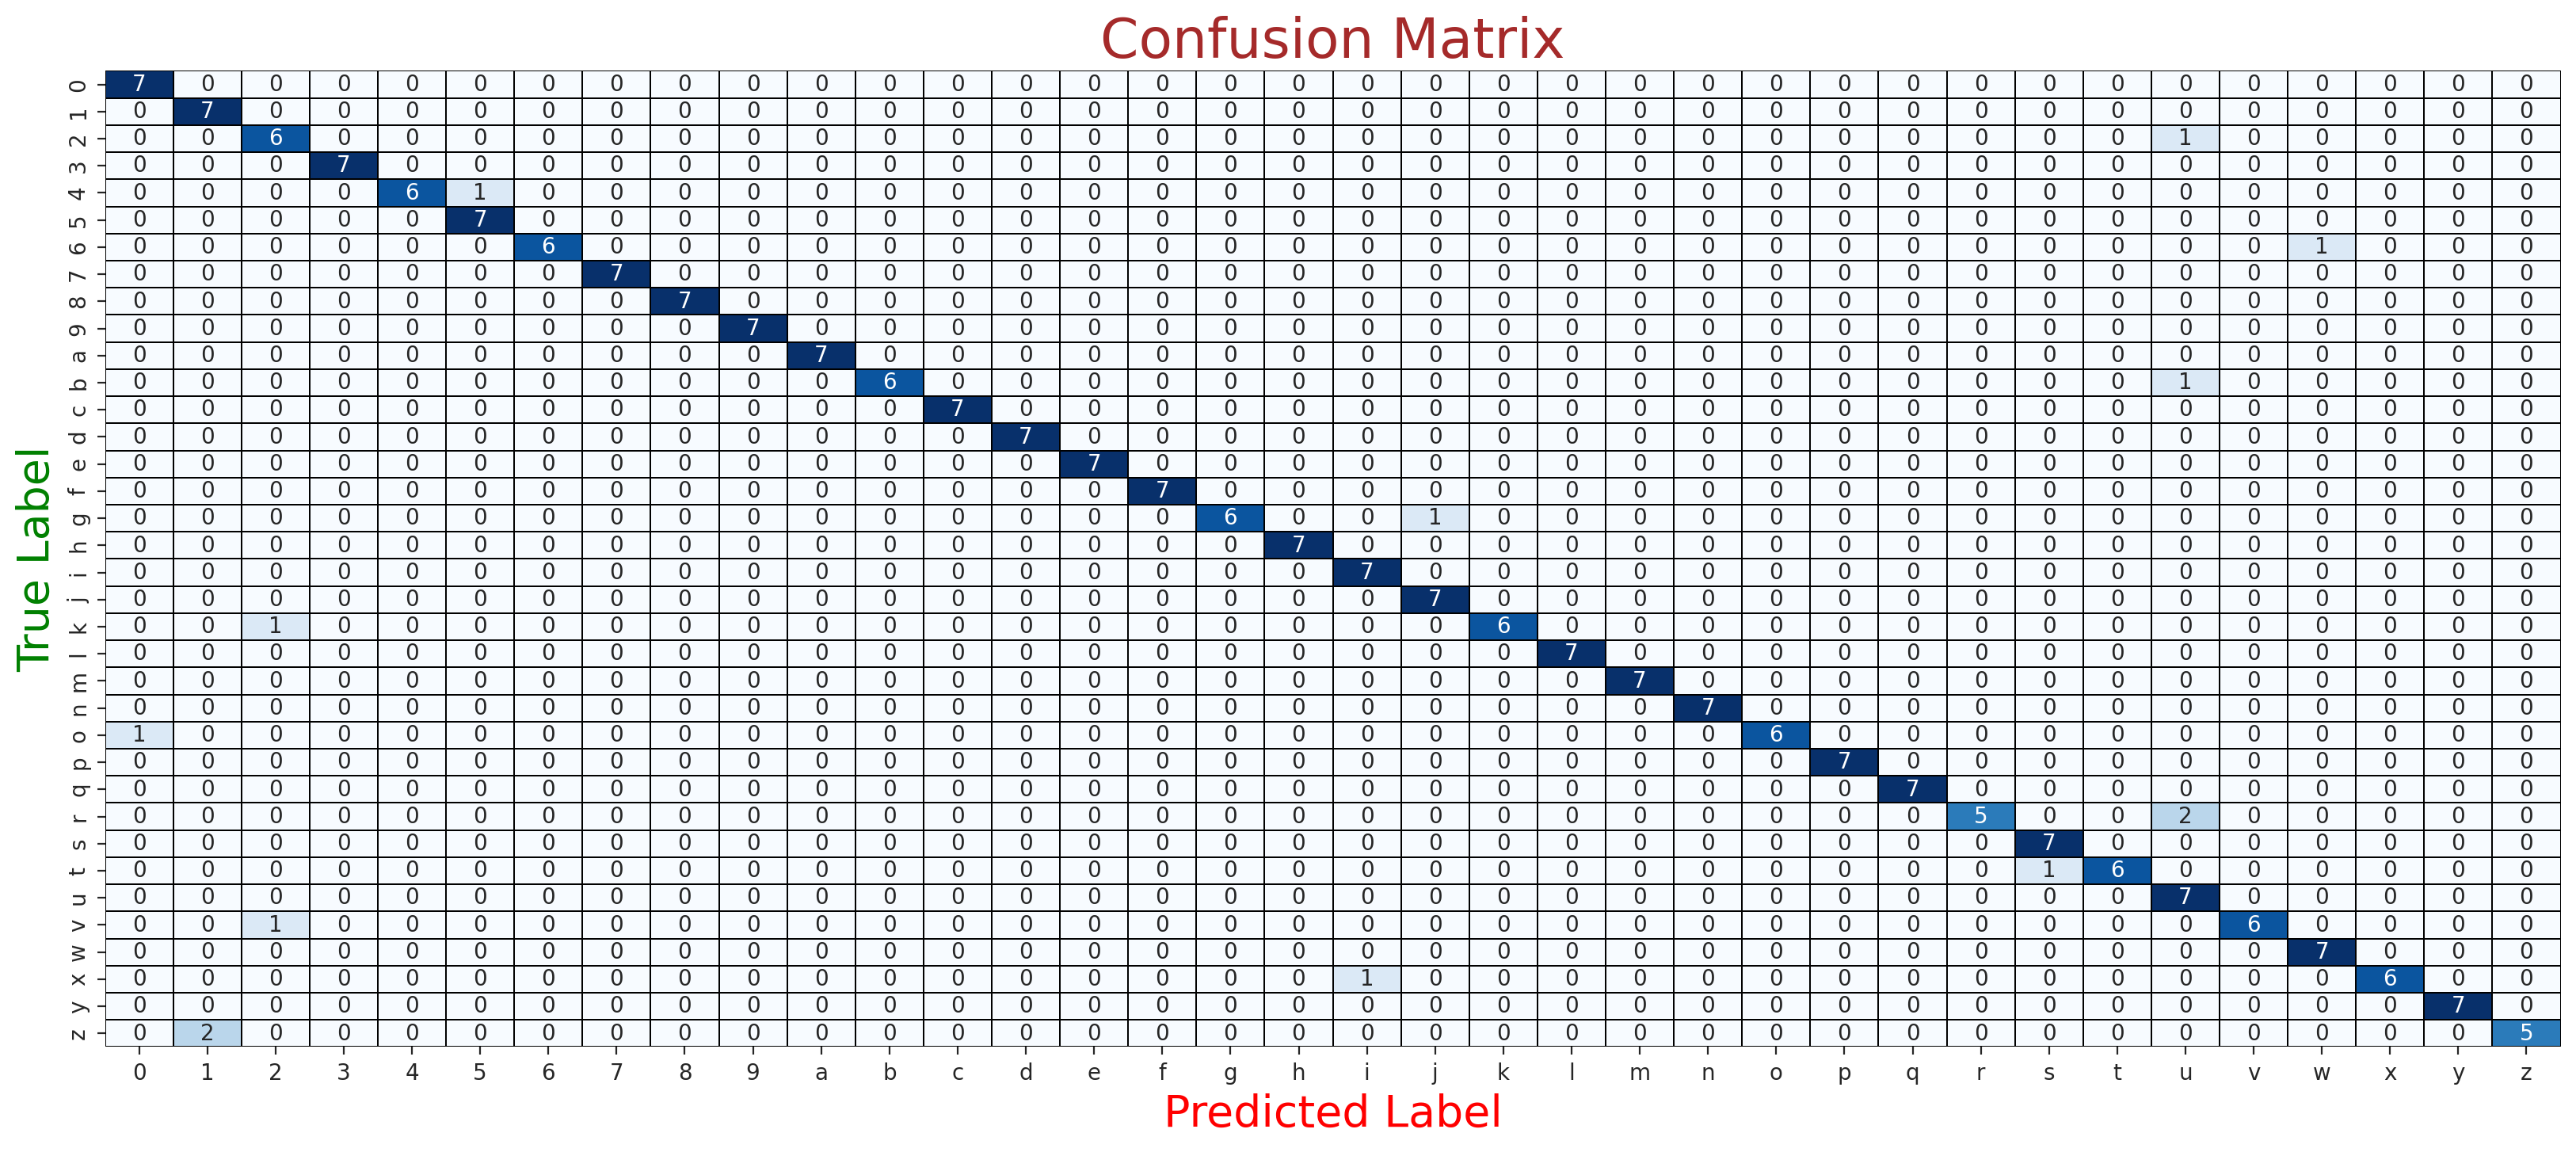

In [ ]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "Blues",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=categories.values(),
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

<h2>Conclusion</h2>
<p>
  The conclusion summarizes the achievement of building a Convolutional Neural Network (CNN) model that classifies hand sign images with an impressive accuracy of 97.00%. It highlights that increasing the image size did not lead to further improvement in the accuracy, suggesting that other factors may need to be optimized.
</p>
<p>
  The project successfully predicted the classes of images from a test set, validating the model’s performance with fresh data. The overall result shows the effectiveness of CNNs in classifying image data, emphasizing their potential in addressing real-world challenges in image recognition and analysis.
</p>
<p>
  The project also serves as an inspiration for exploring the use of deep learning models, particularly CNNs, in various other domains beyond hand sign recognition.
</p>

In [ ]:
model.save("/content/drive/MyDrive/ASL_model.h5")

<h3>Predicting Class of Custom Image</h3>
<p>
  In this snippet, we demonstrate how to use the trained model to predict the class of any custom image.
  The image is first loaded and resized to the target size that the model expects, which is 200x200 pixels in this case.
</p>
<p>
  The image is then converted into a numpy array and rescaled by dividing by 255 (as we did with the training data). We expand the dimensions to match the model's expected input shape and use the model's <code>predict</code> method to get the prediction.
</p>
<p>
  The predicted class index is retrieved, and the corresponding class name (from the <code>categories</code> dictionary) is returned as the result.
</p>
<p>
  The <code>predict_custom_image</code> function can be used to predict the class of any new image by passing its path to the function.
</p>

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_custom_image(image_path, model, target_size=(200, 200)):
    img = image.load_img(image_path, target_size=target_size)

    img_array = image.img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)[0]

    predicted_class_name = categories[predicted_class]

    return predicted_class_name

custom_image_path = '/content/drive/MyDrive/asl_dataset/c/hand1_c_bot_seg_1_cropped.jpeg'
predicted_class_name = predict_custom_image(custom_image_path, model)

print(f"The predicted class for the custom image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
The predicted class for the custom image is: c
